In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Load the dataset
df = pd.read_csv('credit_customers (DS).csv')

In [ ]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


In [ ]:
print(df.head())

  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

In [ ]:
print(df.tail())

    checking_status  duration                  credit_history  \
995     no checking      12.0                   existing paid   
996              <0      30.0                   existing paid   
997     no checking      12.0                   existing paid   
998              <0      45.0                   existing paid   
999        0<=X<200      45.0  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
995  furniture/equipment         1736.0           <100      4<=X<7   
996             used car         3857.0           <100      1<=X<4   
997             radio/tv          804.0           <100         >=7   
998             radio/tv         1845.0           <100      1<=X<4   
999             used car         4576.0     100<=X<500  unemployed   

     installment_commitment     personal_status other_parties  ...  \
995                     3.0  female div/dep/mar          none  ...   
996                     4.0        male div/sep 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
# Display column names
print(df.columns)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [ ]:
# Display data types of each column
print(df.dtypes)

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object


In [ ]:
# Get descriptive statistics
print(df.describe(include='all'))

       checking_status     duration credit_history   purpose  credit_amount  \
count             1000  1000.000000           1000      1000    1000.000000   
unique               4          NaN              5        10            NaN   
top        no checking          NaN  existing paid  radio/tv            NaN   
freq               394          NaN            530       280            NaN   
mean               NaN    20.903000            NaN       NaN    3271.258000   
std                NaN    12.058814            NaN       NaN    2822.736876   
min                NaN     4.000000            NaN       NaN     250.000000   
25%                NaN    12.000000            NaN       NaN    1365.500000   
50%                NaN    18.000000            NaN       NaN    2319.500000   
75%                NaN    24.000000            NaN       NaN    3972.250000   
max                NaN    72.000000            NaN       NaN   18424.000000   

       savings_status employment  installment_commi

In [ ]:
# Check for missing values
print(df.isnull().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [ ]:
# Check for duplicate records
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# Check for duplicate records
print(f"Number of duplicate columns: {df.duplicated().sum()}")

Number of duplicate columns: 0


In [ ]:
# View the distribution of the target variable
print(df['class'].value_counts())

class
good    700
bad     300
Name: count, dtype: int64


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Display unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in checking_status: ['<0' '0<=X<200' 'no checking' '>=200']
Unique values in credit_history: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
Unique values in purpose: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
Unique values in savings_status: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
Unique values in employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
Unique values in personal_status: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
Unique values in other_parties: ['none' 'guarantor' 'co applicant']
Unique values in property_magnitude: ['real estate' 'life insurance' 'no known property' 'car']
Unique values in other_payment_plans: ['none' 'bank' 'stores']
Unique values in housing: ['own' 'for free' 'rent']
Unique values in job: ['skilled' 'unskilled resident' 'high qualif/self emp/mgm

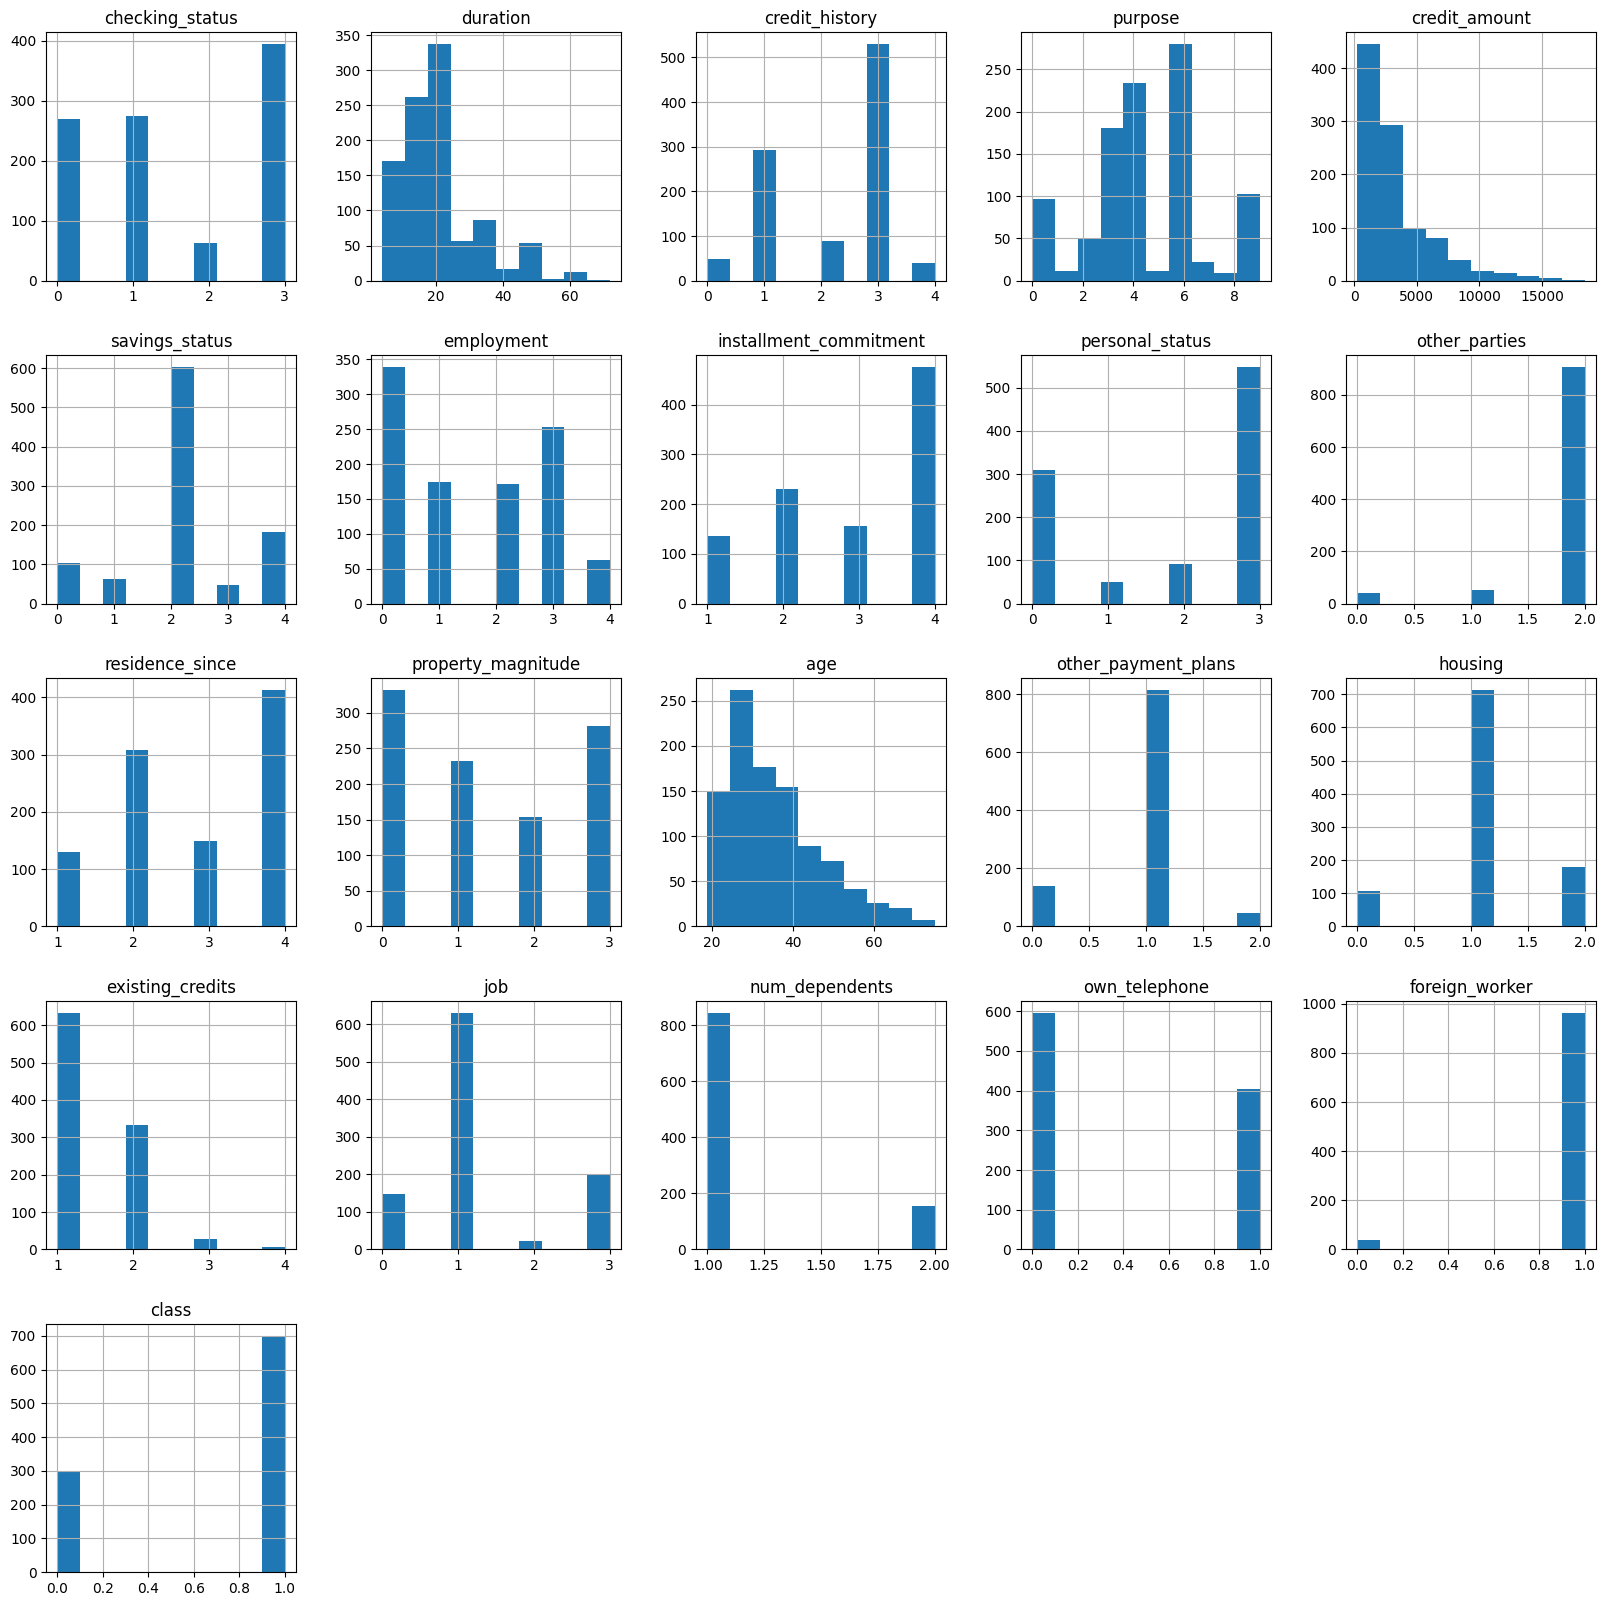

In [ ]:
# Plot the distribution of numerical features
df.hist(figsize=(20, 20))
plt.show()

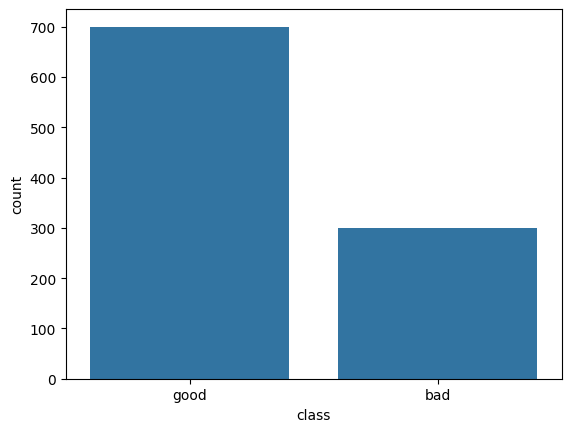

In [ ]:
# Plot the distribution of the target variable
sns.countplot(x='class', data=df)
plt.show()

In [ ]:
# Remove rows with null values
df.dropna(inplace=True)

In [ ]:
# Verify no null values remain
print(df.isnull().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [ ]:
# Check for duplicate records
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
# Verify no duplicate records remain
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows after removal: 0


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
# Separate features and target variable
X = df.drop(columns=['class'])  # Independent variables
y = df['class']  # Dependent variable

In [ ]:
# Verify shapes of X and y
print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes of training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(800, 20) (200, 20) (800,) (200,)


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# Evaluate Logistic Regression
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")

Logistic Regression
[[ 19  40]
 [ 14 127]]
              precision    recall  f1-score   support

           0       0.58      0.32      0.41        59
           1       0.76      0.90      0.82       141

    accuracy                           0.73       200
   macro avg       0.67      0.61      0.62       200
weighted avg       0.71      0.73      0.70       200

Accuracy: 0.73


In [ ]:
print("Predictions using Logistic Regression:")
print(y_pred_log_reg)

Predictions using Logistic Regression:
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1]


In [ ]:
# KNN Classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
# Evaluate KNN
print("KNN Classification")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")

KNN Classification
[[ 14  45]
 [ 18 123]]
              precision    recall  f1-score   support

           0       0.44      0.24      0.31        59
           1       0.73      0.87      0.80       141

    accuracy                           0.69       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.65      0.69      0.65       200

Accuracy: 0.685


In [ ]:
print("Predictions using KNN Classification:")
print(y_pred_knn)

Predictions using KNN Classification:
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1]


In [ ]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)

In [ ]:
# Evaluate SVM Linear
print("SVM with Linear Kernel")
print(confusion_matrix(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_linear)}")


SVM with Linear Kernel
[[ 24  35]
 [ 25 116]]
              precision    recall  f1-score   support

           0       0.49      0.41      0.44        59
           1       0.77      0.82      0.79       141

    accuracy                           0.70       200
   macro avg       0.63      0.61      0.62       200
weighted avg       0.69      0.70      0.69       200

Accuracy: 0.7


In [ ]:
print("Predictions using SVM with Linear Kernel:")
print(y_pred_svm_linear)

Predictions using SVM with Linear Kernel:
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1]


In [ ]:
# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)


In [ ]:
# Evaluate SVM RBF
print("SVM with RBF Kernel")
print(confusion_matrix(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_rbf)}")

SVM with RBF Kernel
[[  3  56]
 [  1 140]]
              precision    recall  f1-score   support

           0       0.75      0.05      0.10        59
           1       0.71      0.99      0.83       141

    accuracy                           0.71       200
   macro avg       0.73      0.52      0.46       200
weighted avg       0.72      0.71      0.61       200

Accuracy: 0.715


In [ ]:
print("Predictions using SVM with RBF Kernel:")
print(y_pred_svm_rbf)

Predictions using SVM with RBF Kernel:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'KNN': accuracy_score(y_test, y_pred_knn),
    'SVM Linear': accuracy_score(y_test, y_pred_svm_linear),
    'SVM RBF': accuracy_score(y_test, y_pred_svm_rbf)
}

In [ ]:
# Determine the best model
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"The model with the best accuracy is {best_model} with an accuracy of {model_accuracies[best_model]}")

The model with the best accuracy is Logistic Regression with an accuracy of 0.73
